In [5]:
# Packages
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [6]:
# Load in movie metadata
data = pd.read_csv("movie_metadata.csv");

# Use only rows with no data missing
data = data.dropna();

# Use only numeric data
data = data.select_dtypes(include=[np.number])

# Separate gross from data
labels = data['gross'];
data = data.drop(columns=['gross']);

data = data.values;

In [25]:
#Constants
minLoss = 1e-5; # minimum loss
bestCLF = None; # best classifier
bestI = 0; # best iteration

#Lists
depth = []; # depth of tree 
allCLFs = []; # all the classifiers
r2 = []; # All the coefficients of determinations (R^2)

def run_reg(regularization):
    
    """ Performs regularization based on the array. Instaniaties the Linear Regression model, 
        splits the data, fits the data to the regression model, and then saves all the R2 score 
        (coefficient of determination) to the list. Also records all the classifiers' scores.
        
        Inputs:
        
        regularization: array of n size
        
        Outputs:
        
        r2: list of all the r2 coefficients
    
    """
    for i in regularization:
        #instantiate the classifier at each depth i, use SVD instead of auto (avoid ill-conditioned warning)
        reg = linear_model.Ridge(alpha=i, solver='svd');

        # Split the training and testing data up 
        xtrain, xtest, ytrain, ytest = train_test_split(data, labels, test_size=0.1);
        reg.fit(xtrain, ytrain);
        r2.append(reg.score(xtest, ytest));

        allCLFs.append(reg);
    return r2

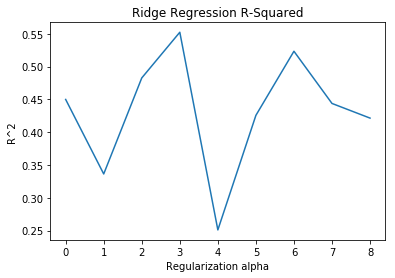

In [26]:
# Plot of R^2 vs alpha with 10 different alphas
regularization = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9];
r2 = run_reg(regularization)
plt.plot(r2);
plt.xlabel('Regularization alpha');
plt.ylabel('R^2');
plt.title('Ridge Regression R-Squared');

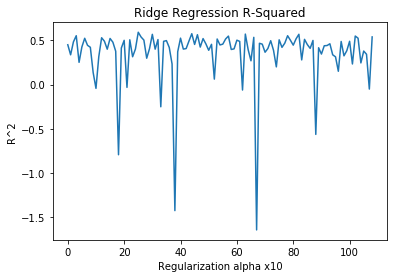

In [27]:
# Plot of R^2 vs alpha with 100 different alphas
regularization = np.linspace(0, 1, num=100);
r2 = run_reg(regularization)
plt.plot(r2);
plt.xlabel('Regularization alpha x10');
plt.ylabel('R^2');
plt.title('Ridge Regression R-Squared');